In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import get_train_results, add_scatterplot, add_history_plot
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

model_name = 'cnn'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [4]:
y_test_k01, predictions_k01, history_k01 = get_train_results(model_name, "k0.1")
y_test_k05, predictions_k05, history_k05 = get_train_results(model_name, "k0.5")
y_test_k5, predictions_k5, history_k5 = get_train_results(model_name, "k5.0")
y_test_k10, predictions_k10, history_k10 = get_train_results(model_name, "k10.0")

## Plots

k=0.1: pearson coefs= 0.99999994386611
k=0.5: pearson coefs= 0.9999926330852881
k=5.0: pearson coefs= 0.9999996874723157
k=10.0: pearson coefs= 0.9999998561607109


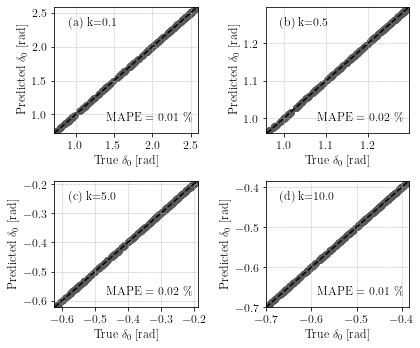

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

print('k=0.1: pearson coefs=', stats.pearsonr(y_test_k01, predictions_k01)[0])
add_scatterplot(axs, (0, 0), y_test_k01, predictions_k01, str_label='(a) k=0.1', nticks=6)

print('k=0.5: pearson coefs=', stats.pearsonr(y_test_k05, predictions_k05)[0])
add_scatterplot(axs, (0, 1), y_test_k05, predictions_k05, str_label='(b) k=0.5', nticks=6)

print('k=5.0: pearson coefs=', stats.pearsonr(y_test_k5, predictions_k5)[0])
add_scatterplot(axs, (1, 0), y_test_k5, predictions_k5, str_label='(c) k=5.0', nticks=6)

print('k=10.0: pearson coefs=', stats.pearsonr(y_test_k10, predictions_k10)[0])
add_scatterplot(axs, (1, 1), y_test_k10, predictions_k10, str_label='(d) k=10.0', nticks=6)

plt.tight_layout()
plt.savefig('output/'+model_name+'/double_yukawa_scatter.pdf', format='pdf')
plt.show()

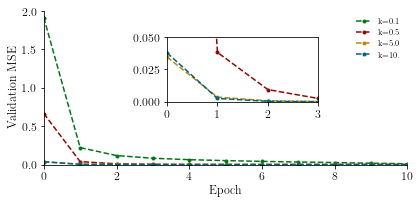

In [9]:
plt.style.use('seaborn-dark-palette') 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(history_k01['loss'], label='k=0.1', marker='.', linestyle='dashed', color=colors[1])
ax.plot(history_k05['loss'], label='k=0.5', marker='.', linestyle='dashed', color=colors[2])
ax.plot(history_k5['loss'], label='k=5.0', marker='.', linestyle='dashed', color=colors[4])
ax.plot(history_k10['loss'], label='k=10.', marker='.', linestyle='dashed', color=colors[5])

ax2 = fig.add_axes([0.4, 0.5, 0.35, 0.3])
ax2.plot(history_k01['loss'], label='k=0.1', marker='.', linestyle='dashed', color=colors[1])
ax2.plot(history_k05['loss'], label='k=0.5', marker='.', linestyle='dashed', color=colors[2])
ax2.plot(history_k5['loss'], label='k=5.0', marker='.', linestyle='dashed', color=colors[4])
ax2.plot(history_k10['loss'], label='k=10.', marker='.', linestyle='dashed', color=colors[5])
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 0.05)
ax2.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)

ax.set_ylabel('Validation MSE')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right', frameon=False)
ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.set_xlim(0, 10)
ax.set_ylim(0, 2)

plt.tight_layout()
plt.grid(False)
plt.savefig('output/'+model_name+'/double_yukawa_history.pdf', format='pdf')
plt.show()


## Model transferability

k=0.1: pearson coefs= 0.9288253279805048
k=0.5: pearson coefs= 0.7449454535298237
k=5.0: pearson coefs= -0.9990584349558637
k=10.0: pearson coefs= -0.9996130681965749


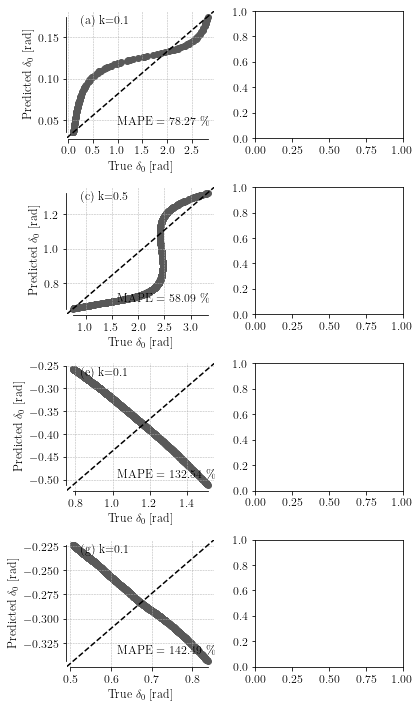

In [6]:

fig, axs = plt.subplots(4, 2, figsize=(6, 10))

model_name = 'cnn'

# k=0.1
dset_name = 'k0.1'
predictions = np.load('output/predict_yukawa/predictions_%s.npy'%dset_name)
y_test = np.load('output/predict_yukawa/y_test_%s.npy'%dset_name)
print('k=0.1: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

add_subplot(axs, 0, y_test, predictions, str_labels=('(a) k=0.1', '(b)'), nticks=6)

# k=0.5
dset_name = 'k0.5'
predictions = np.load('output/predict_yukawa/predictions_%s.npy'%dset_name)
y_test = np.load('output/predict_yukawa/y_test_%s.npy'%dset_name)
print('k=0.5: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

add_subplot(axs, 1, y_test, predictions, str_labels=('(c) k=0.5', '(d)'), nticks=6)


# k=5.0
dset_name = 'k5.0'
predictions = np.load('output/predict_yukawa/predictions_%s.npy'%dset_name)
y_test = np.load('output/predict_yukawa/y_test_%s.npy'%dset_name)
print('k=5.0: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

add_subplot(axs, 2, y_test, predictions, str_labels=('(e) k=0.1', '(f)'), nticks=6)

# k=10.0
dset_name = 'k10.0'
predictions = np.load('output/predict_yukawa/predictions_%s.npy'%dset_name)
y_test = np.load('output/predict_yukawa/y_test_%s.npy'%dset_name)
print('k=10.0: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

add_subplot(axs, 3, y_test, predictions, str_labels=('(g) k=0.1', '(h)'), nticks=6)

plt.tight_layout()
plt.show()